In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.metrics.cluster import v_measure_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
#carregar a base
Base = pd.read_csv('res/balance-scale.csv')
Base

,class,Peso esquerdo,Distancia esquerda,Peso Direito,Distancia Direita
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [46]:
#vendo os tipos dos atributos
Base.dtypes

class                 object
Peso esquerdo          int64
Distancia esquerda     int64
 Peso Direito          int64
 Distancia Direita     int64
dtype: object

In [47]:
#adicionando os tipos na descrição da base 
#Base.describe(include=['float64', 'int64','object', 'bool'])
#coloquei para garantir que os valores vazios tenham algum valor 
#Base = Base.replace("NaN", np.NaN)
#Subistituindo valores categoricos 
#for col in Base.columns:
#    if Base[col].dtypes == 'object':
#        Base[col] = Base[col].fillna(Base[col].value_counts().index[0])
#mostrando o tipo novamente
#Base.dtypes

In [48]:
#subistituir com Label encoder, subistituindo dados categoricos em númericos 
atributos = ["class"]
enc = OrdinalEncoder()
enc.fit(Base[atributos])
Base[atributos] = enc.transform(Base[atributos])
Base.describe(include=['float64', 'int64','object', 'bool'])
Base

,class,Peso esquerdo,Distancia esquerda,Peso Direito,Distancia Direita
0,0.0,1,1,1,1
1,2.0,1,1,1,2
2,2.0,1,1,1,3
3,2.0,1,1,1,4
4,2.0,1,1,1,5
...,...,...,...,...,...
620,1.0,5,5,5,1
621,1.0,5,5,5,2
622,1.0,5,5,5,3
623,1.0,5,5,5,4


In [49]:
Base.dtypes

class                 float64
Peso esquerdo           int64
Distancia esquerda      int64
 Peso Direito           int64
 Distancia Direita      int64
dtype: object

In [50]:
#usando One Hot Enconder 
Base = pd.get_dummies(Base, columns=["Peso esquerdo","Distancia esquerda"," Peso Direito"," Distancia Direita"])
Base

,class,Peso esquerdo_1,Peso esquerdo_2,Peso esquerdo_3,Peso esquerdo_4,Peso esquerdo_5,Distancia esquerda_1,Distancia esquerda_2,Distancia esquerda_3,Distancia esquerda_4,...,Peso Direito_1,Peso Direito_2,Peso Direito_3,Peso Direito_4,Peso Direito_5,Distancia Direita_1,Distancia Direita_2,Distancia Direita_3,Distancia Direita_4,Distancia Direita_5
0,0.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
621,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
622,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
623,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
#Criar meu Y class e X bases
y = Base.iloc[:,0]
X = Base.iloc[:,1:]

X

,Peso esquerdo_1,Peso esquerdo_2,Peso esquerdo_3,Peso esquerdo_4,Peso esquerdo_5,Distancia esquerda_1,Distancia esquerda_2,Distancia esquerda_3,Distancia esquerda_4,Distancia esquerda_5,Peso Direito_1,Peso Direito_2,Peso Direito_3,Peso Direito_4,Peso Direito_5,Distancia Direita_1,Distancia Direita_2,Distancia Direita_3,Distancia Direita_4,Distancia Direita_5
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
621,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
622,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
623,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [37]:
y

0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: class, Length: 625, dtype: object

In [38]:
#Padronizando
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5
1,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5
2,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5
3,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,2.0,-0.5
4,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,2.0,-0.5,-0.5,-0.5,-0.5
621,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,2.0,-0.5,-0.5,-0.5
622,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,2.0,-0.5,-0.5
623,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,2.0,-0.5


In [39]:
#Calculando distancia entre cada elemento
pd.DataFrame(pairwise_distances(X, metric='euclidean'))

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.000000,3.535534,3.535534,3.535534,3.535534,3.535534,5.000000,5.000000,5.000000,5.000000,...,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068
1,3.535534,0.000000,3.535534,3.535534,3.535534,5.000000,3.535534,5.000000,5.000000,5.000000,...,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068
2,3.535534,3.535534,0.000000,3.535534,3.535534,5.000000,5.000000,3.535534,5.000000,5.000000,...,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068
3,3.535534,3.535534,3.535534,0.000000,3.535534,5.000000,5.000000,5.000000,3.535534,5.000000,...,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068
4,3.535534,3.535534,3.535534,3.535534,0.000000,5.000000,5.000000,5.000000,5.000000,3.535534,...,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,...,3.535534,5.000000,5.000000,5.000000,5.000000,0.000000,3.535534,3.535534,3.535534,3.535534
621,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,...,5.000000,3.535534,5.000000,5.000000,5.000000,3.535534,0.000000,3.535534,3.535534,3.535534
622,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,...,5.000000,5.000000,3.535534,5.000000,5.000000,3.535534,3.535534,0.000000,3.535534,3.535534
623,7.071068,7.071068,7.071068,6.123724,7.071068,7.071068,7.071068,7.071068,6.123724,7.071068,...,5.000000,5.000000,5.000000,3.535534,5.000000,3.535534,3.535534,3.535534,0.000000,3.535534


Projecting 20-dimensional data to 2D


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: class, Length: 625, dtype: object

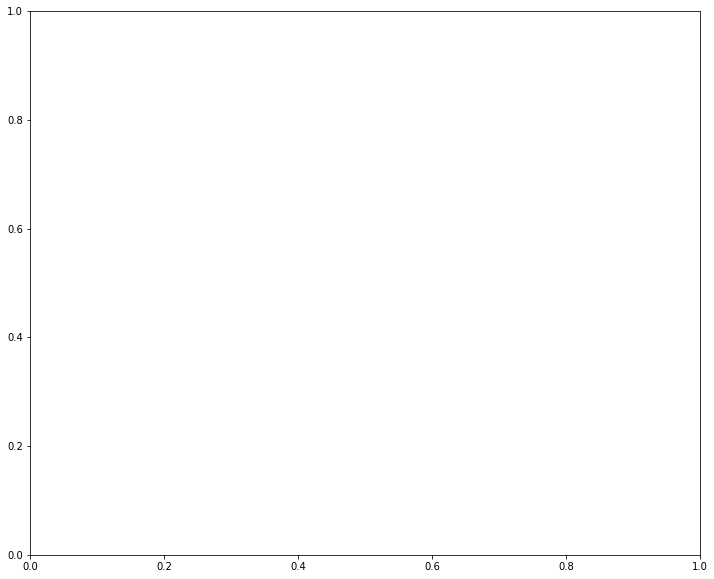

In [40]:
#usando PCA para reduzir a dimensionalidade 
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('MNIST. PCA projection');

In [11]:
#Gerando clusters Sem PCA
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
pd.DataFrame(labels)

,0
0,0
1,0
2,1
3,0
4,0
...,...
620,0
621,0
622,0
623,0


In [12]:
#Calculando metricas Sem PCA
metrics.silhouette_score(X, labels, metric='euclidean')

0.04745128394586809

In [13]:
 metrics.adjusted_rand_score(y, labels)

0.01164686808952755

In [14]:
metrics.adjusted_mutual_info_score(y, labels)

0.008030282069412826

In [15]:
v_measure_score(y, labels)

0.010044840243048669

Projecting 20-dimensional data to 2D


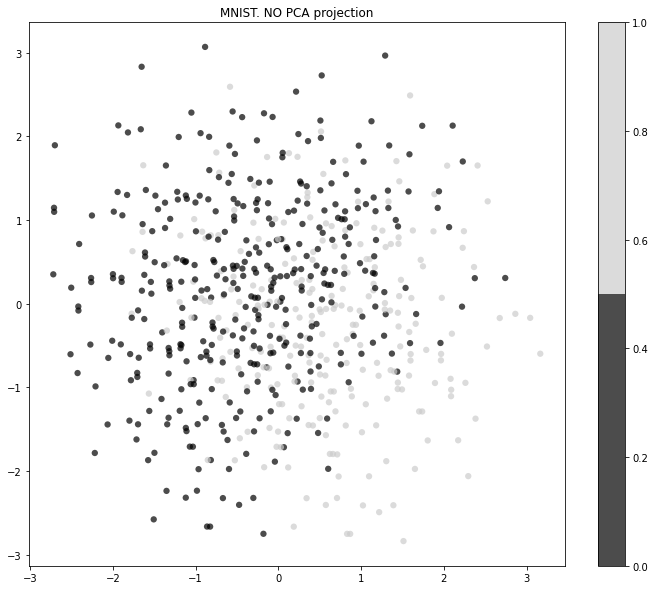

In [16]:

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',2))
plt.colorbar()
plt.title('MNIST. NO PCA projection');

In [17]:
#Gerando clusters com xreduced com PCA
kmeans = KMeans(n_clusters=2).fit(X_reduced)
labels = kmeans.labels_
pd.DataFrame(labels)

,0
0,0
1,0
2,0
3,0
4,0
...,...
620,0
621,0
622,0
623,0


In [18]:
#Calculando Metricas com PCA
metrics.silhouette_score(X, labels, metric='euclidean')

0.04195415511912405

In [19]:
 metrics.adjusted_rand_score(y, labels)

0.004897773263978068

In [20]:
metrics.adjusted_mutual_info_score(y, labels)

0.002616232792637073

In [21]:
v_measure_score(y, labels)

0.004617009427066298

Projecting 20-dimensional data to 2D


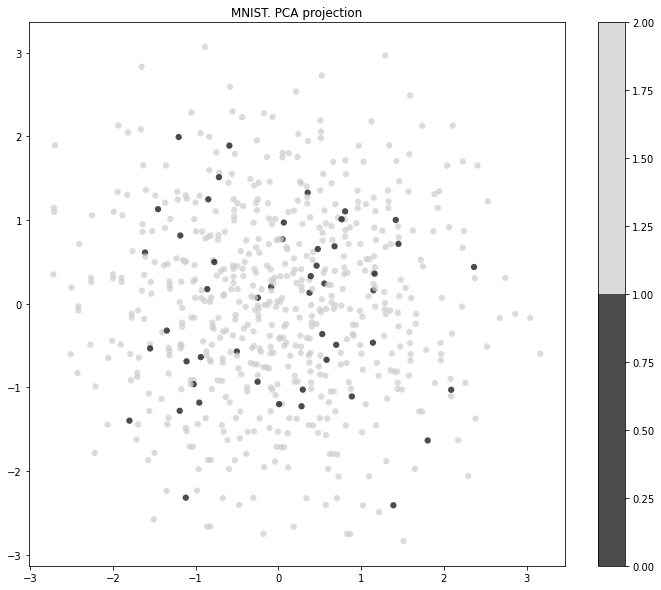

In [22]:

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('MNIST. PCA projection');

# pratica do projeto

In [13]:
#carregar a base
Base = pd.read_csv('res/balance-scale.csv')
#subistituir com Label encoder, subistituindo dados categoricos em númericos (apenas a classe)
atributos = ["class"]
enc = OrdinalEncoder()
enc.fit(Base[atributos])
Base[atributos] = enc.transform(Base[atributos])
Base.describe(include=['float64', 'int64','object', 'bool'])
Base

,class,Peso esquerdo,Distancia esquerda,Peso Direito,Distancia Direita
0,0.0,1,1,1,1
1,2.0,1,1,1,2
2,2.0,1,1,1,3
3,2.0,1,1,1,4
4,2.0,1,1,1,5
...,...,...,...,...,...
620,1.0,5,5,5,1
621,1.0,5,5,5,2
622,1.0,5,5,5,3
623,1.0,5,5,5,4


In [14]:
#subistituir com Label encoder, subistituindo dados categoricos em númericos 
atributos = ["class"]
enc = OrdinalEncoder()
enc.fit(Base[atributos])
Base[atributos] = enc.transform(Base[atributos])
Base.describe(include=['float64', 'int64','object', 'bool'])
Base

,class,Peso esquerdo,Distancia esquerda,Peso Direito,Distancia Direita
0,0.0,1,1,1,1
1,2.0,1,1,1,2
2,2.0,1,1,1,3
3,2.0,1,1,1,4
4,2.0,1,1,1,5
...,...,...,...,...,...
620,1.0,5,5,5,1
621,1.0,5,5,5,2
622,1.0,5,5,5,3
623,1.0,5,5,5,4


In [15]:
Base.dtypes

class                 float64
Peso esquerdo           int64
Distancia esquerda      int64
 Peso Direito           int64
 Distancia Direita      int64
dtype: object

In [5]:
#Criar meu Y class e X bases
y = Base.iloc[:,0]
X = Base.iloc[:,1:]
#Padronizando
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X



,0,1,2,3
0,-1.414214,-1.414214,-1.414214,-1.414214
1,-1.414214,-1.414214,-1.414214,-0.707107
2,-1.414214,-1.414214,-1.414214,0.000000
3,-1.414214,-1.414214,-1.414214,0.707107
4,-1.414214,-1.414214,-1.414214,1.414214
...,...,...,...,...
620,1.414214,1.414214,1.414214,-1.414214
621,1.414214,1.414214,1.414214,-0.707107
622,1.414214,1.414214,1.414214,0.000000
623,1.414214,1.414214,1.414214,0.707107


In [31]:
#primeiramenta vamos dividir a base usando o Holdout em 70% treinamento e 30% teste 
# vamos usar os 70% para a avaliação
#usaremos o valor de k de 1 até 15 ou seja o k vai ter um valor diferente de vizinho por vez que repetir
#por fim o k-fold pega apenas os dados de treino para fazer a validação no caso o x_treino
#retornado pelo holdout ous seja os 70% dividido em 10 parcelas
#treinando o knn com o conjunto atual feito
#testar os resultados passando a curacia para fazer a validação q e o subconjunto dos dados de treinamentoque
#que usamos para validar o k
#por fim temos o valor medio de Acurácia para cada valor do knn


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

valores_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
resultados_knn = []

for k in valores_k:
    resultados_k = []
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        knn.fit(X_train, y_train)
        resultados_k.append(knn.score(X_validacao, y_validacao))
    resultados_knn.append(sum(resultados_k)/len(resultados_k))
resultados_knn

[0.8055496828752642,
 0.7525898520084567,
 0.8192389006342495,
 0.8009513742071881,
 0.8446088794926003,
 0.853752642706131,
 0.8854651162790699,
 0.885676532769556,
 0.8899577167019027,
 0.8880549682875264,
 0.8878964059196617,
 0.9015856236786469,
 0.8948731501057082,
 0.8880549682875264,
 0.8926004228329809]

In [32]:
#usando o melhor valor obtido do parametro irei usar ele para fazer o treinamento real 
#valor da acuracia

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_treino, y_treino)
knn.score(X_teste, y_teste)

0.8457446808510638

In [33]:
#precisão
y_pred = knn.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.5749299719887956

In [34]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.6259259259259259

In [35]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.5957222853774579

In [36]:
#para o Svc usaremos 4 valores de kernel para saber qual e o melhor apartir da sua media

valores_kernel = ["linear", "poly", "rbf", "sigmoid"]
resultados_svm = []

for kernel in valores_kernel:
    resultados_kernel = []
    svc = SVC(kernel=kernel)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        svc.fit(X_train, y_train)
        resultados_kernel.append(svc.score(X_validacao, y_validacao))
    resultados_svm.append(sum(resultados_kernel)/len(resultados_kernel))
resultados_svm


[0.9083509513742072,
 0.8716173361522198,
 0.9035940803382664,
 0.8511099365750526]

In [37]:
#de acordo valor de kernel obtido vamos usar ele para construir o classificador

svc = SVC(kernel="linear")
svc.fit(X_treino, y_treino)
svc.score(X_teste, y_teste)


0.8882978723404256

In [38]:
#precisão
y_pred = svc.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.8002019185758104

In [39]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.8601851851851853

In [40]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.8147077094445517

In [41]:
#para a mlp rede neural testaremos 4 codigos de ativação para saber qual e o melhor apartir da sua media

valores_ativacao = ["identity", "logistic", "tanh", "relu"]
resultados_mlp = []

for ativacao in valores_ativacao:
    resultados_ativacao = []
    mlp = MLPClassifier(activation=ativacao)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        mlp.fit(X_train, y_train)
        resultados_ativacao.append(svc.score(X_validacao, y_validacao))
    resultados_mlp.append(sum(resultados_ativacao)/len(resultados_ativacao))
resultados_mlp

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\p

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\p

[0.9292283298097251, 0.929016913319239, 0.9289640591966173, 0.9289640591966173]

In [42]:
#como os valores foram iguais/empataram escolhir um deles.para obter a curacia de..
mlp = MLPClassifier(activation="identity")
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

0.8563829787234043

In [43]:
#precisão
y_pred = mlp.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5720705411427062

In [44]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.6324074074074074

In [45]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.5994943346755314

In [46]:
#navebays
gnb = GaussianNB()
gnb.fit(X_treino, y_treino)
gnb.score(X_teste, y_teste)

0.8882978723404256

In [47]:
#precisão
y_pred = gnb.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5929951690821257

In [48]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.6555555555555556

In [49]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.6217116217116216

In [50]:
arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(X_treino, y_treino)
arvore.score(X_teste, y_teste)

0.776595744680851

In [51]:
#precisão
y_pred = arvore.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.5636524822695036

In [52]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.5740740740740741

In [53]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.5660581473968898